In [1]:
import glob
import json
import os

In [2]:
with open('data/class_indices', 'r') as myfile:
    data=myfile.read()

# parse file
obj = json.loads(data)

In [4]:
obj.keys()

dict_keys(['Baked Potato', 'Burger', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog', 'Pizza', 'Sandwich', 'Taco', 'Taquito'])

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
files=glob.glob("data/raw/Fast Food Classification V2/Train/*/*.jpg",recursive=True)

print(*files[:10],sep='\n')

data/raw/Fast Food Classification V2/Train/Donut/Donut (2).jpg
data/raw/Fast Food Classification V2/Train/Donut/Donut (14).jpg
data/raw/Fast Food Classification V2/Train/Donut/Donut (17).jpg
data/raw/Fast Food Classification V2/Train/Donut/Donut (28).jpg
data/raw/Fast Food Classification V2/Train/Donut/Donut (50).jpg
data/raw/Fast Food Classification V2/Train/Donut/Donut (32).jpg
data/raw/Fast Food Classification V2/Train/Donut/Donut (58).jpg
data/raw/Fast Food Classification V2/Train/Donut/Donut (26).jpg
data/raw/Fast Food Classification V2/Train/Donut/Donut (55).jpg
data/raw/Fast Food Classification V2/Train/Donut/Donut (8).jpg


Found 15000 images belonging to 10 classes.


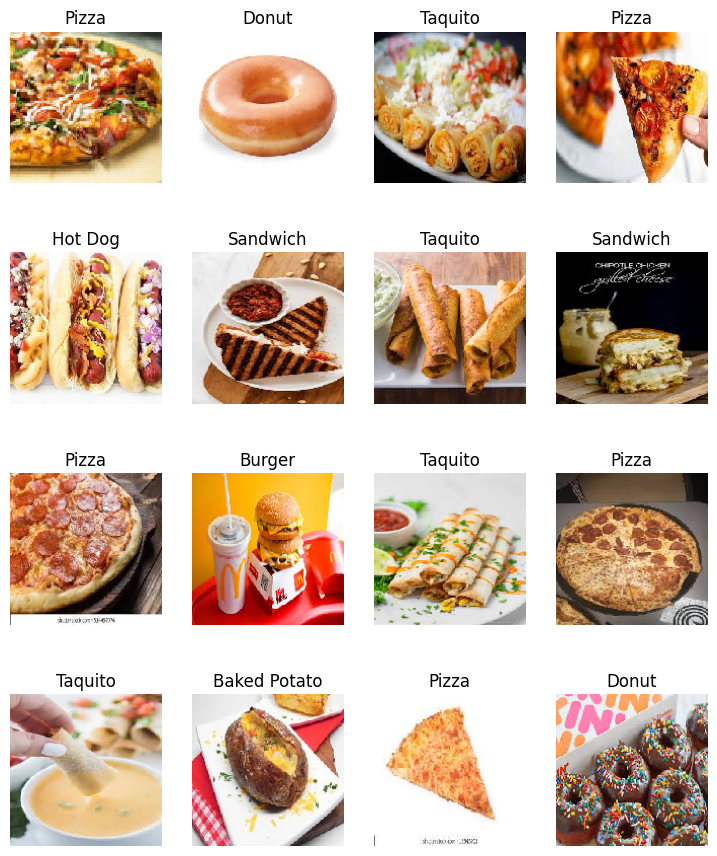

In [2]:
data_gen=tf.keras.preprocessing.image.ImageDataGenerator()
generator=data_gen.flow_from_directory(directory="data/raw/Fast Food Classification V2/Train",
                                       target_size=(150,150),
                                       batch_size=16,
                                       class_mode="categorical")
labels_dict=generator.class_indices
data=next(generator)
batch_imgs=data[0]
batch_labels=np.where(data[1]==1)[1]

res=dict(zip(list(labels_dict.values()),
             list(labels_dict.keys())))

plt.figure(figsize=(9,11))
for index,img in enumerate(batch_imgs):
    plt.subplot(4,4,index+1)
    plt.title(res[batch_labels[index]])
    plt.axis('off')
    plt.imshow(img/255)
plt.savefig("reports/batch.png",dpi=300,bbox_inches='tight')

In [4]:
import os

train_path="data/raw/Fast Food Classification V2/Train/"
folders=[train_path+name for name in os.listdir(train_path)]
#print(*folders,sep="\n")

dict_data={}
for folder in folders:
    files=glob.glob(folder+'/*.*')
    dict_data[os.path.basename(folder)]=len(files)
print(dict_data)
    

{'Pizza': 1500, 'Sandwich': 1500, 'Burger': 1500, 'Crispy Chicken': 1500, 'Donut': 1500, 'Fries': 1500, 'Baked Potato': 1500, 'Hot Dog': 1500, 'Taco': 1500, 'Taquito': 1500}


In [18]:
import plotly.express as px
import pandas as df
import plotly.io as pio

fig=px.bar(df.DataFrame.from_dict(dict_data,orient='index'),
           template='plotly_white',
           text_auto=True,
           labels={'value':'count',
                   'index':'class'},
           orientation='h',
           height=580,
           width=580)
fig.update_layout(showlegend=False,
                  margin={'r':10,
                          't':10,
                          'b':15})

# For transparent background
# paper_bgcolor="rgba(0,0,0,0)"
# plot_bgcolor="rgba(0,0,0,0)"

fig.show()
pio.write_image(fig, 
                'reports/image.png',
                scale=5, 
                width=580, 
                height=580)